In [1]:
from google.colab import files
uploaded = files.upload()


Saving boss employe.txt to boss employe.txt


In [2]:
file_name = list(uploaded.keys())[0]

with open(file_name, 'r', encoding='ISO-8859-1') as f:
    raw_chat = f.readlines()


In [3]:
import re
import pandas as pd

pattern = r'(\d{1,2}/\d{1,2}/\d{2,4}),\s(\d{1,2}:\d{2})\s(?:AM|PM|am|pm)\s-\s([^:]+):\s(.*)'

messages = []
for line in raw_chat:
    match = re.match(pattern, line)
    if match:
        date, time, sender, message = match.groups()
        messages.append([date, time, sender, message])

df = pd.DataFrame(messages, columns=['Date', 'Time', 'Sender', 'Message'])
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df[df['Message'].notna()]  # Remove blank messages
df.head()


,Date,Time,Sender,Message
0,2025-06-05,09:00,Boss,Good morning âï¸ Have you completed the draft?
1,2025-06-05,09:02,Client,Good morning sir ð Iâm working on it. Wil...
2,2025-06-05,11:15,Client,"Sir, Iâve mailed you the draft ð§ Please c..."
3,2025-06-05,11:30,Boss,Got it ð Iâll review and get back in an h...
4,2025-06-05,01:00,Boss,Overall good ð But please revise the conclu...


In [4]:
!pip install -q textblob
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.polarity
    if polarity > 0.2:
        return 'Positive'
    elif polarity < -0.2:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Message'].apply(get_sentiment)
df.head()


,Date,Time,Sender,Message,Sentiment
0,2025-06-05,09:00,Boss,Good morning âï¸ Have you completed the draft?,Positive
1,2025-06-05,09:02,Client,Good morning sir ð Iâm working on it. Wil...,Positive
2,2025-06-05,11:15,Client,"Sir, Iâve mailed you the draft ð§ Please c...",Neutral
3,2025-06-05,11:30,Boss,Got it ð Iâll review and get back in an h...,Neutral
4,2025-06-05,01:00,Boss,Overall good ð But please revise the conclu...,Positive


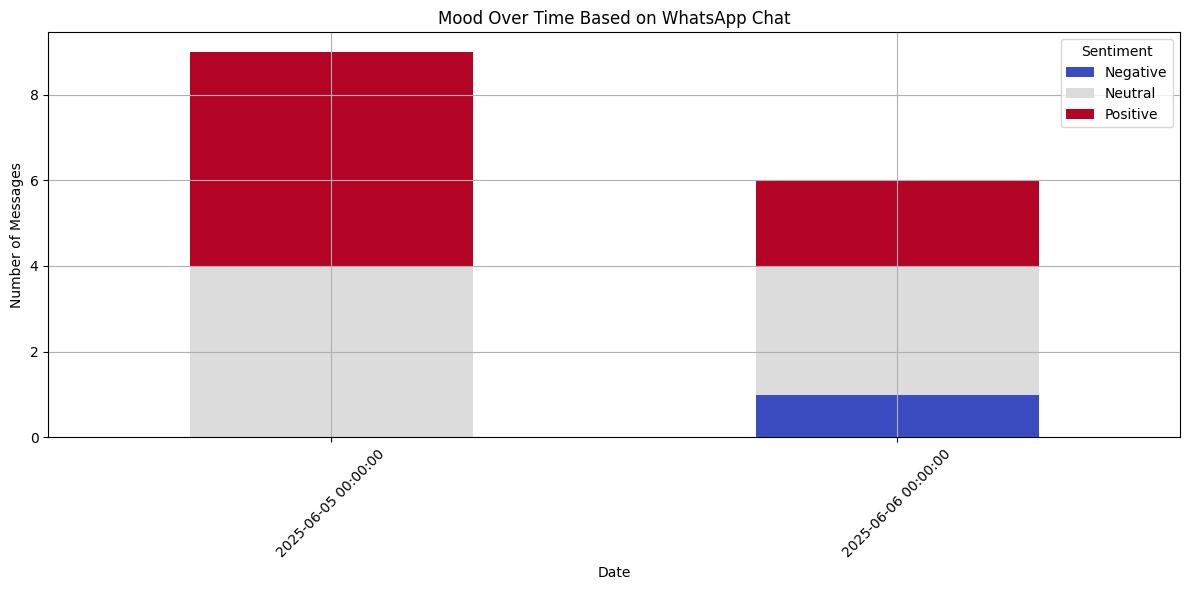

In [5]:
import matplotlib.pyplot as plt

sentiment_counts = df.groupby(['Date', 'Sentiment']).size().unstack(fill_value=0)

sentiment_counts.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12, 6))
plt.title("Mood Over Time Based on WhatsApp Chat")
plt.xlabel("Date")
plt.ylabel("Number of Messages")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
from collections import Counter
import string

def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

all_words = ' '.join(df['Message'])
words = clean_text(all_words).split()
word_freq = Counter(words).most_common(10)

print("Top 10 Words:")
for word, freq in word_freq:
    print(f"{word}: {freq}")


Top 10 Words:
sir: 8
good: 5
the: 5
it: 5
you: 4
draft: 3
will: 3
please: 3
morning: 2
have: 2


In [8]:
!pip install emoji
import emoji

all_emojis = [c for c in all_words if c in emoji.EMOJI_DATA]
emoji_freq = Counter(all_emojis).most_common(5)

print("Top Emojis:")
for emj, count in emoji_freq:
    print(f"{emj}: {count}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 10.6 MB/s eta 0:00:00
Top Emojis:


In [9]:
df.to_csv('analyzed_chat.csv', index=False)
